In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/energy-consumption.csv')

df.head(10)

,category,type,name,date,time,energy
0,commercial,StripMall,TX_HOUSTON,2004-01-02,00:00,15.106999
1,commercial,StripMall,TX_HOUSTON,2004-01-02,01:00,15.106999
2,commercial,StripMall,TX_HOUSTON,2004-01-02,02:00,15.106999
3,commercial,StripMall,TX_HOUSTON,2004-01-02,03:00,15.106999
4,commercial,StripMall,TX_HOUSTON,2004-01-02,04:00,15.106999
5,commercial,StripMall,TX_HOUSTON,2004-01-02,05:00,15.106999
6,commercial,StripMall,TX_HOUSTON,2004-01-02,06:00,24.396885
7,commercial,StripMall,TX_HOUSTON,2004-01-02,07:00,25.925035
8,commercial,StripMall,TX_HOUSTON,2004-01-02,08:00,33.824998
9,commercial,StripMall,TX_HOUSTON,2004-01-02,09:00,50.217275


/var/folders/1c/qqdm58sj5mjfk3xjz79fxzph0000gn/T/ipykernel_8333/991656454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])


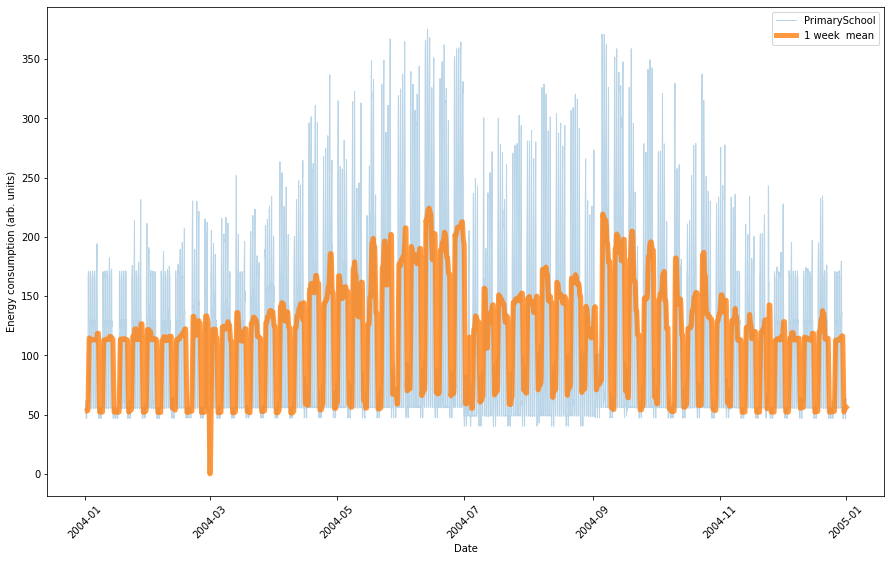

In [12]:
df_tmp = df.query("name =='TX_HOUSTON' & type == 'PrimarySchool' ")


df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])
df_tmp.set_index('dt', inplace=True)
df_tmp = df_tmp.drop(['date', 'time'], axis=1)
df_tmp = df_tmp.resample('1H').sum()



fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_tmp['energy'], label='PrimarySchool', lw=1, color = 'C0', alpha = 0.3)
ax.plot(
        df_tmp['energy'].rolling(24).mean(), color='C1',
        label='1 week  mean', zorder=3, alpha = 0.8, lw = 5,
        )
ax.legend()
ax.set_ylabel('Energy consumption (arb. units)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)

plt.show()

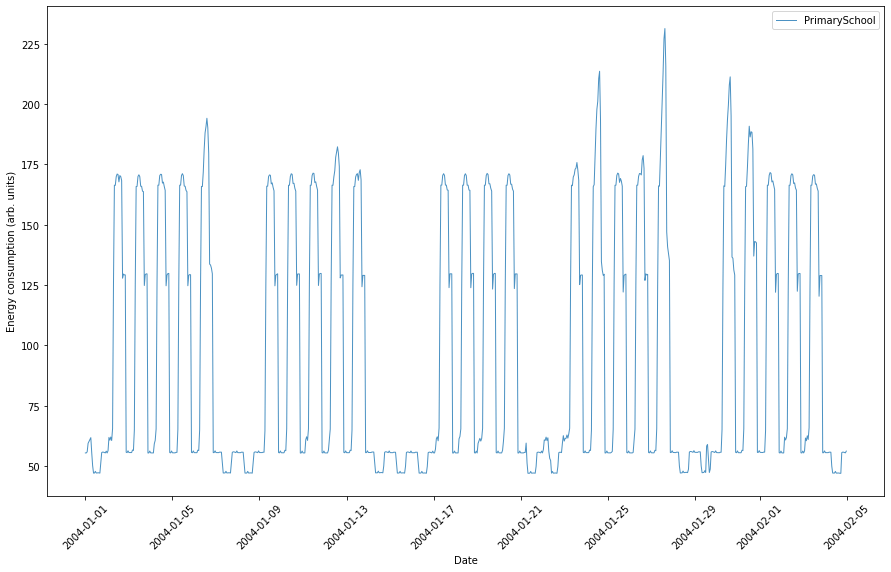

In [13]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_tmp['energy'].head(24*7*5), label='PrimarySchool', lw=1, color = 'C0', alpha = 0.8)
ax.legend()
ax.set_ylabel('Energy consumption (arb. units)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)


plt.show()